In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
# import statsmodels.api as sm
# from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy import fftpack

# Objectif du notebook

Le signal des variables exogènes précédemment construites va être filtré afin de réduire leur bruit.

In [2]:
# Import du fichier correspondant à la période de 3H
df = pd.read_csv('./exog/exog_3H_FR.csv', sep = ';')
df.head(1)

,Dates,Vent,Humidite,Pluie_eol,Temperature_eol,Diff_pression,Chauffage,Eau,Soleil,TCH_nucleaire,TCH_thermique,TCH_hydraulique,TCH_solaire
0,2013-01-01 00:00:00,5.409751,86.301303,1.000891,8.130811,-1288.211642,-7.39391,0.292275,8.05,0.796988,0.553299,0.235903,0.0


In [3]:
france = df[['Dates']]

# Vent

In [4]:
data = df['Vent'].values

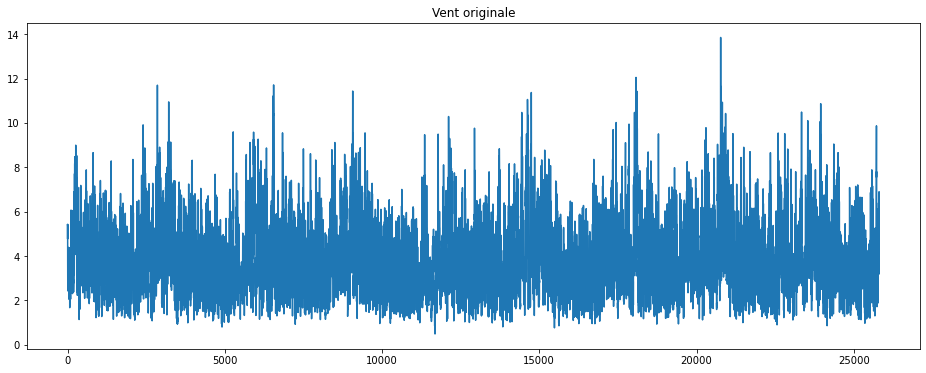

In [5]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Vent originale');

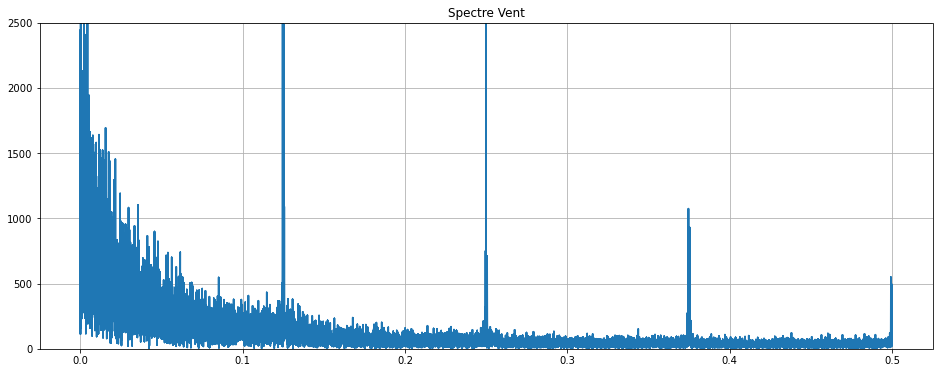

In [6]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre Vent')
plt.ylim((0, 2500))
plt.grid();

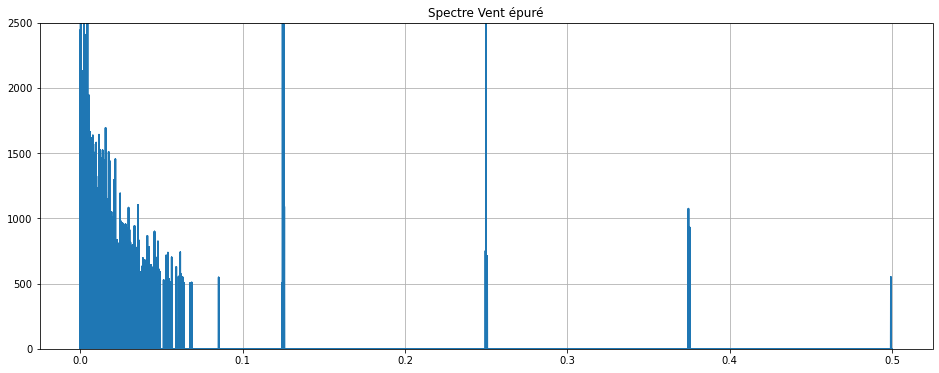

In [7]:
# Elimination du bruit
filtre = 500
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre Vent épuré')
plt.ylim((0, 2500))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


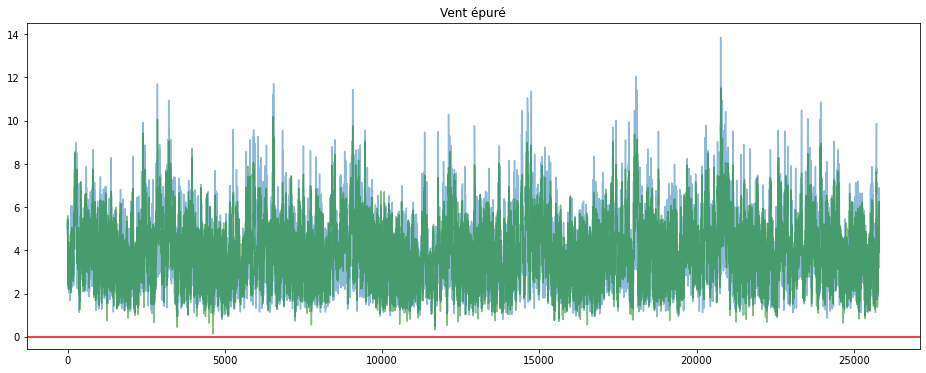

In [8]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('Vent épuré')
plt.axhline(0, color = 'r')
plt.savefig('./png/signal_exog_vent_3H');

In [9]:
france['Vent'] = filtered_data.tolist()

<ipython-input-9-8f3efb8b072f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['Vent'] = filtered_data.tolist()


# Humidité

In [10]:
data = df['Humidite'].values

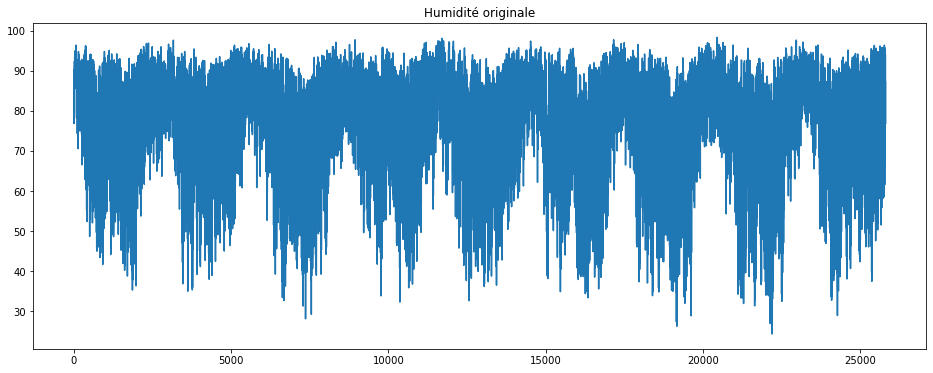

In [11]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Humidité originale');

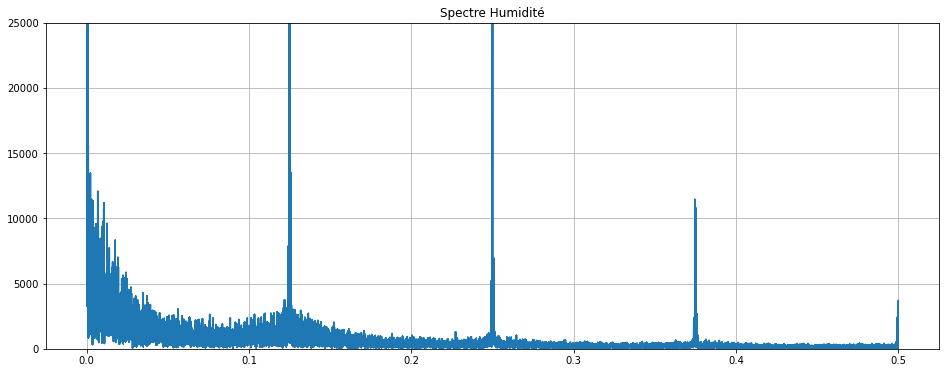

In [12]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre Humidité')
plt.ylim((0, 25000))
plt.grid();

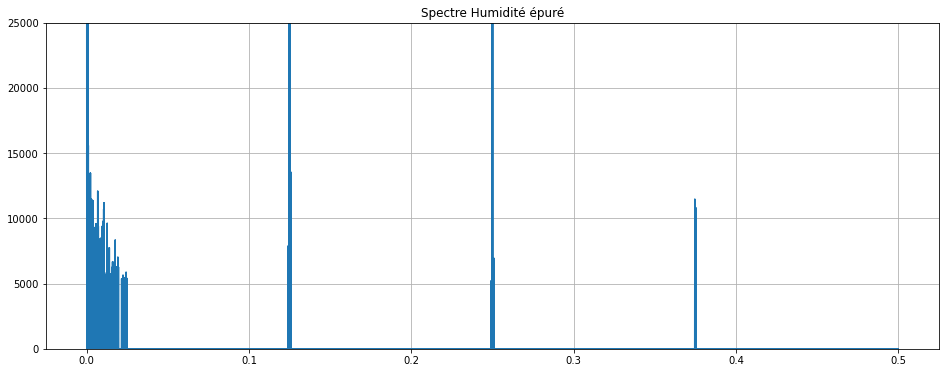

In [13]:
# Elimination du bruit
filtre = 5000
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre Humidité épuré')
plt.ylim((0, 25000))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


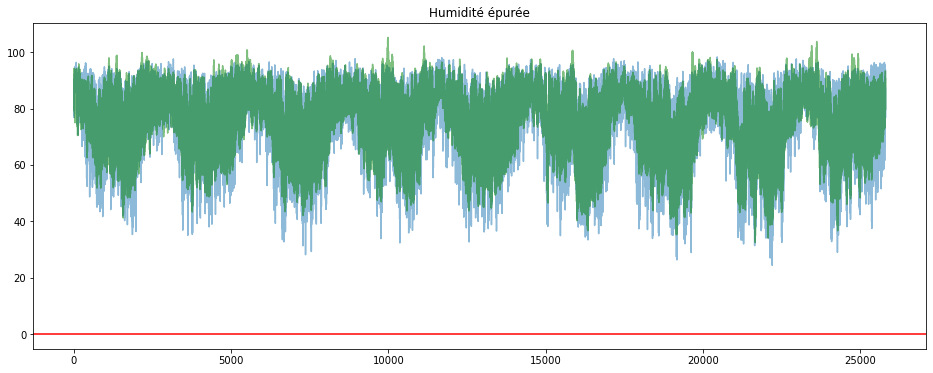

In [14]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('Humidité épurée')
plt.axhline(0, color = 'r')
plt.savefig('./png/signal_exog_humidite_3H');

In [15]:
france['Humidite'] = filtered_data.tolist()

<ipython-input-15-961f064f0c25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['Humidite'] = filtered_data.tolist()


# Pluie éolienne

In [16]:
data = df['Pluie_eol'].values

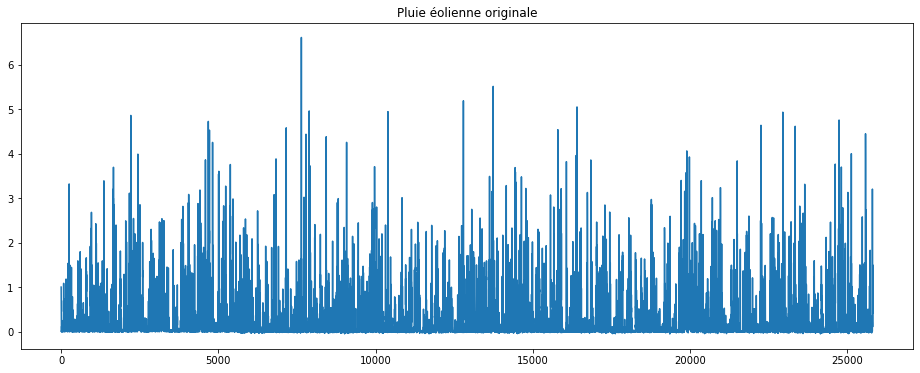

In [17]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Pluie éolienne originale');

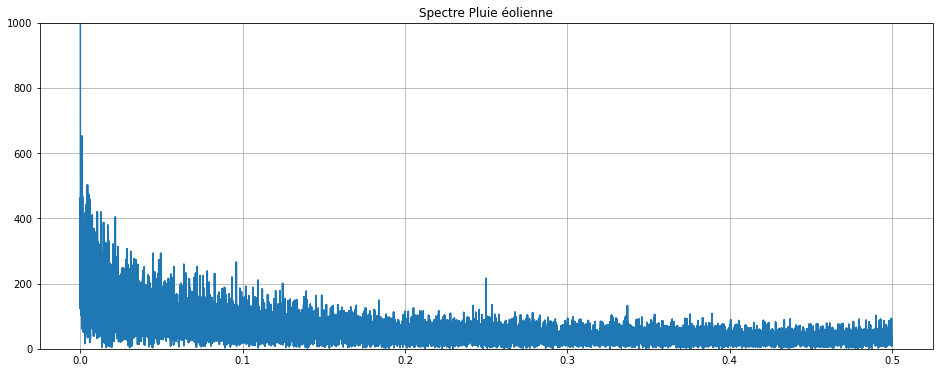

In [18]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre Pluie éolienne')
plt.ylim((0, 1000))
plt.grid();

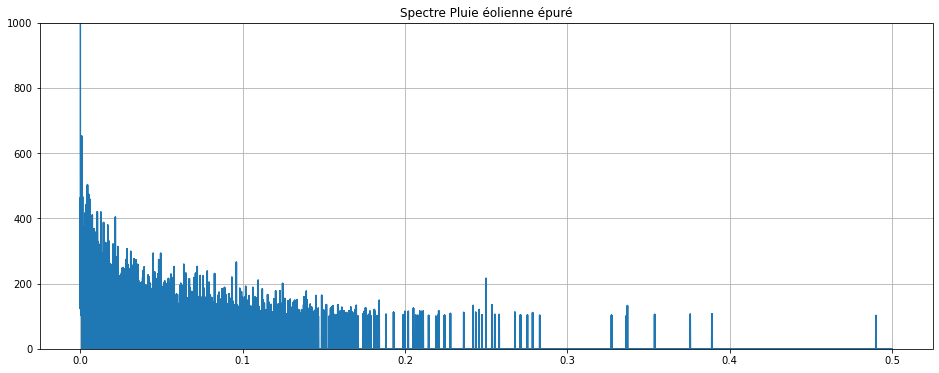

In [19]:
# Elimination du bruit
filtre = 100
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre Pluie éolienne épuré')
plt.ylim((0, 1000))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


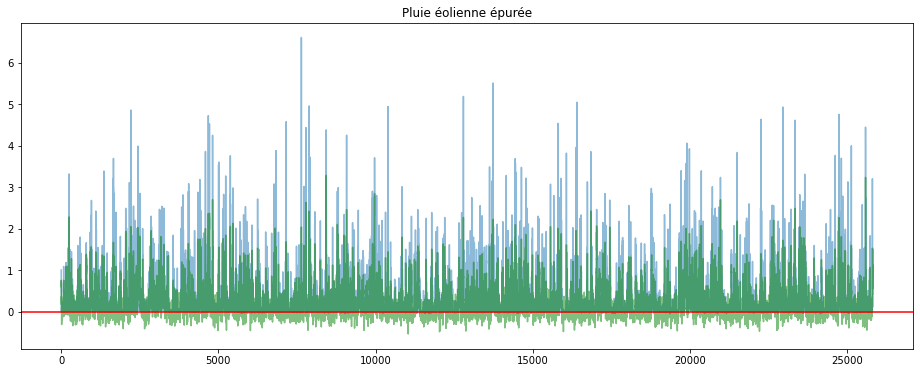

In [20]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('Pluie éolienne épurée')
plt.axhline(0, color = 'r');

In [21]:
france['Pluie_eol'] = filtered_data.tolist()

<ipython-input-21-21b7f1e815ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['Pluie_eol'] = filtered_data.tolist()


# Température éolienne

In [22]:
data = df['Temperature_eol'].values

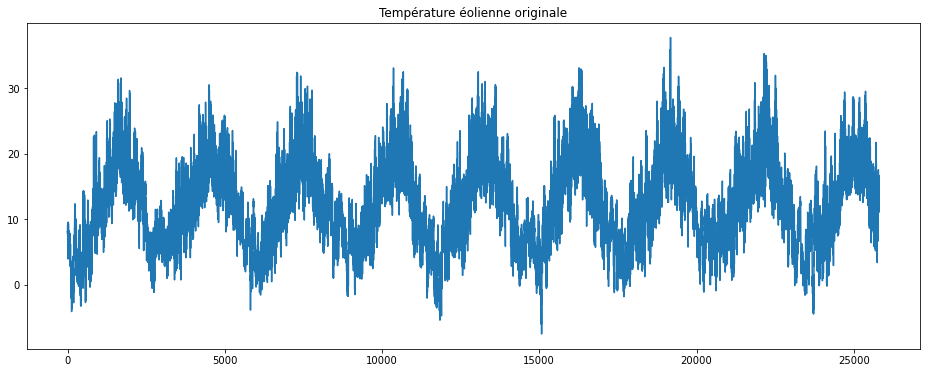

In [23]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Température éolienne originale');

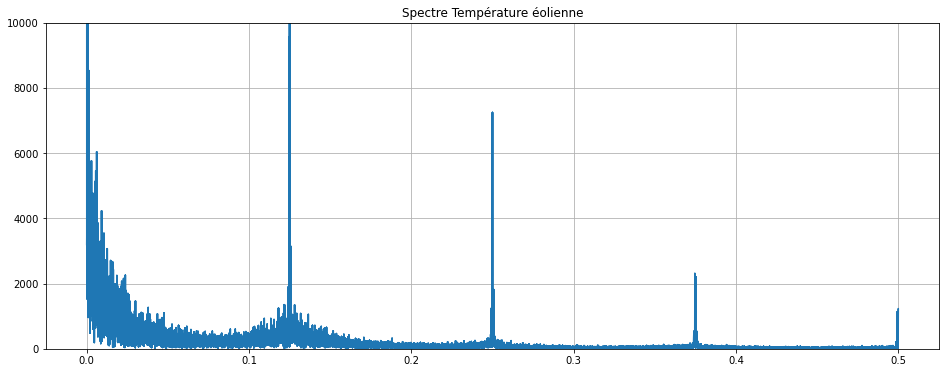

In [24]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre Température éolienne')
plt.ylim((0, 10000))
plt.grid();

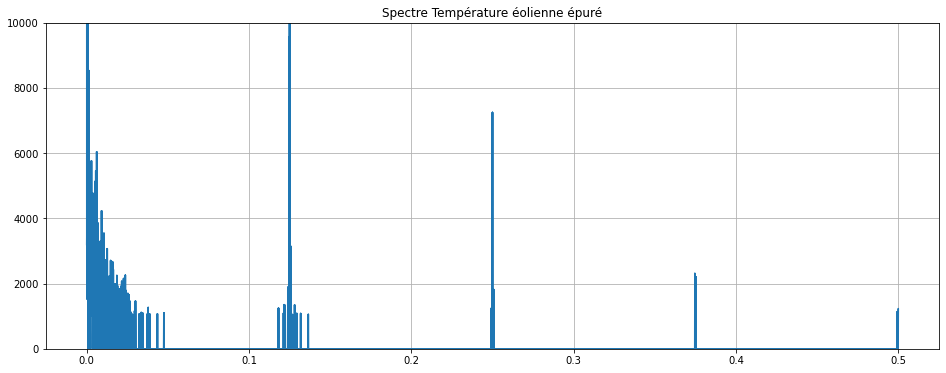

In [25]:
# Elimination du bruit
filtre = 1000
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre Température éolienne épuré')
plt.ylim((0, 10000))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


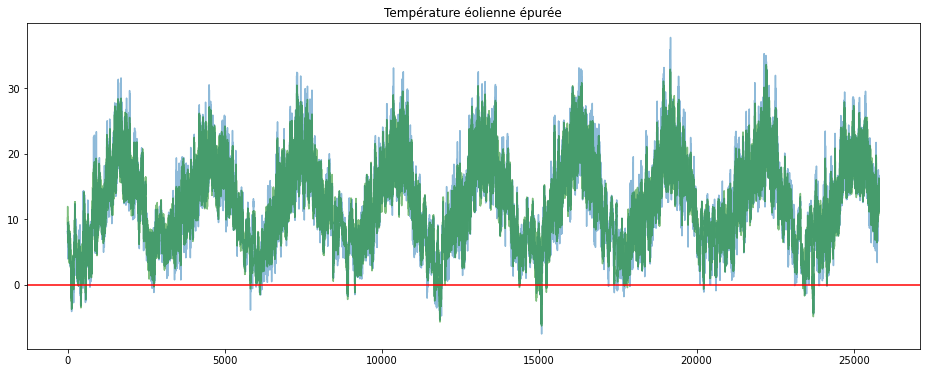

In [26]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('Température éolienne épurée')
plt.axhline(0, color = 'r');

In [27]:
france['Temperature_eol'] = filtered_data.tolist()

<ipython-input-27-2c1d846cb3b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['Temperature_eol'] = filtered_data.tolist()


# Différence de pression entre mer et station

In [28]:
data = df['Diff_pression'].values

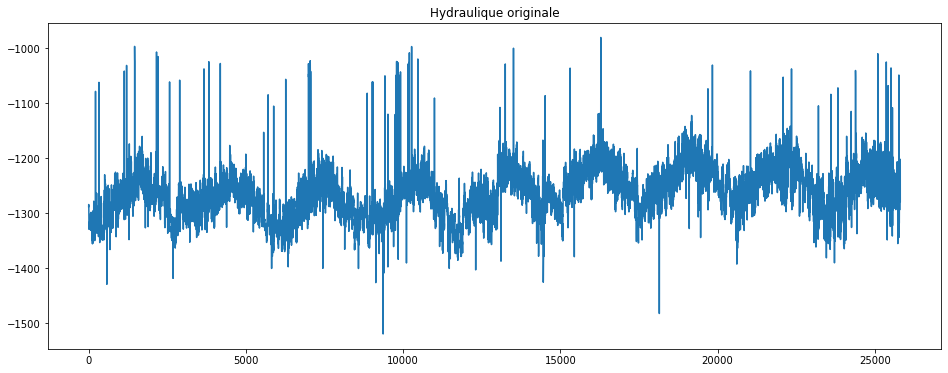

In [29]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Hydraulique originale');

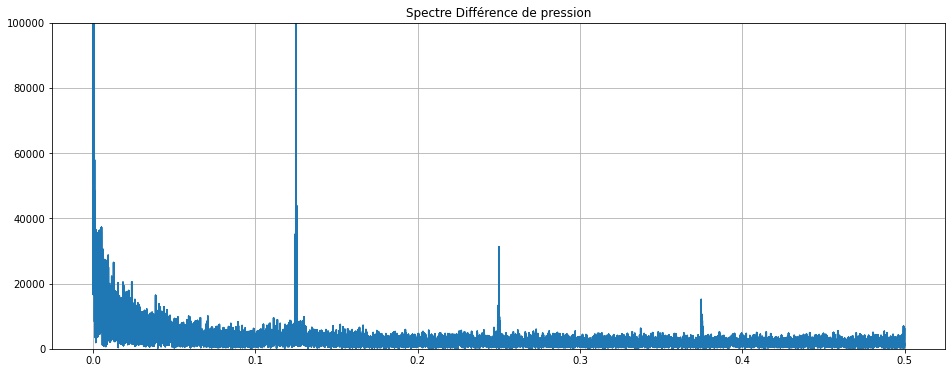

In [30]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre Différence de pression')
plt.ylim((0, 100000))
plt.grid();

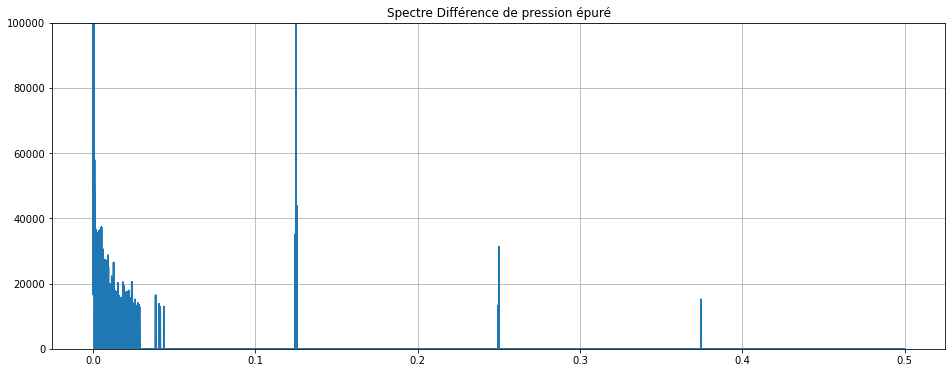

In [31]:
# Elimination du bruit
filtre = 12500
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre Différence de pression épuré')
plt.ylim((0, 100000))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


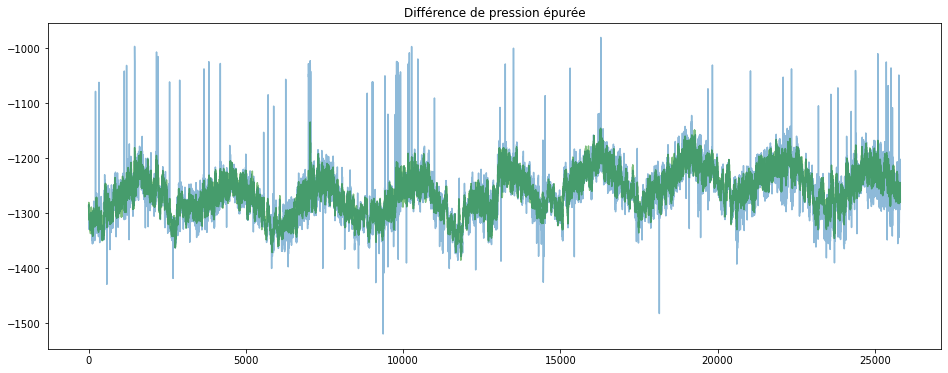

In [32]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('Différence de pression épurée')
plt.savefig('./png/signal_exog_pression_difference_3H');

In [33]:
france['Diff_pression'] = filtered_data.tolist()

<ipython-input-33-b75f86bf272b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['Diff_pression'] = filtered_data.tolist()


# Chauffage

In [34]:
data = df['Chauffage'].values

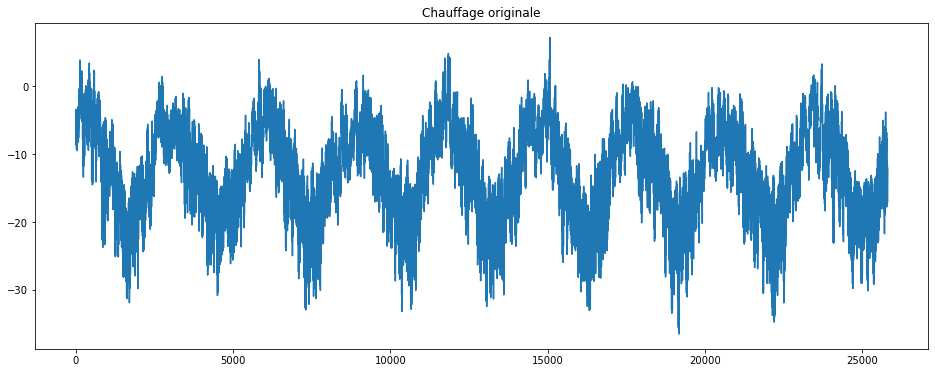

In [35]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Chauffage originale');

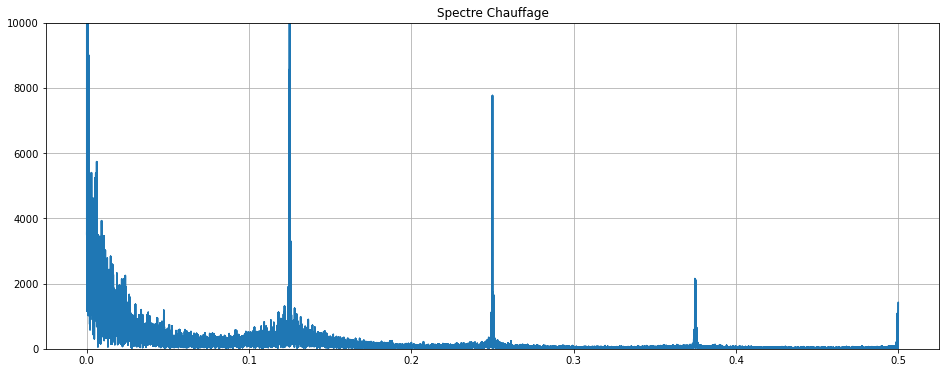

In [36]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre Chauffage')
plt.ylim((0, 10000))
plt.grid();

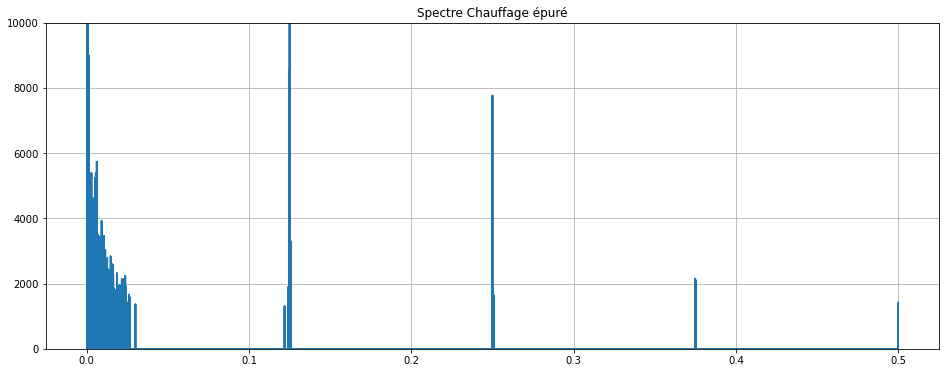

In [37]:
# Elimination du bruit
filtre = 1250
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre Chauffage épuré')
plt.ylim((0, 10000))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


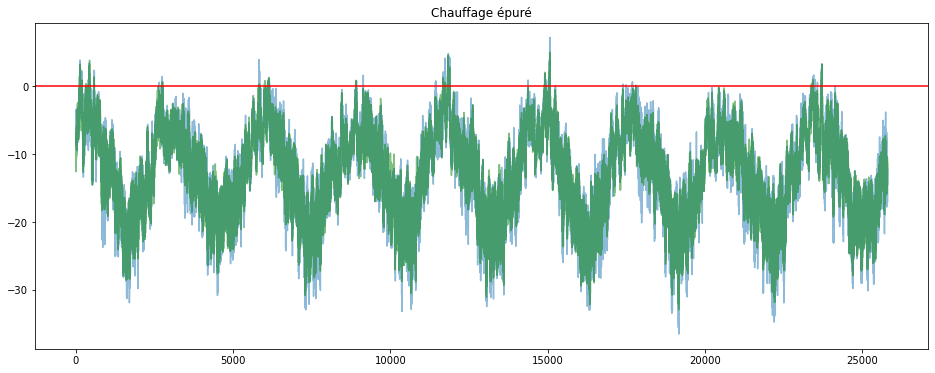

In [38]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('Chauffage épuré')
plt.axhline(0, color = 'r')
plt.savefig('./png/signal_exog_chauffage_3H');

In [39]:
france['Chauffage'] = filtered_data.tolist()

<ipython-input-39-23dd2e4c58d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['Chauffage'] = filtered_data.tolist()


# Eau

In [40]:
data = df['Eau'].values

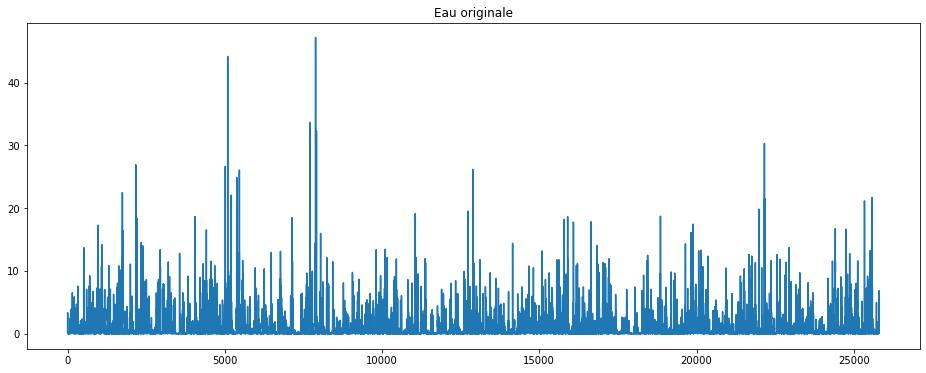

In [41]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Eau originale');

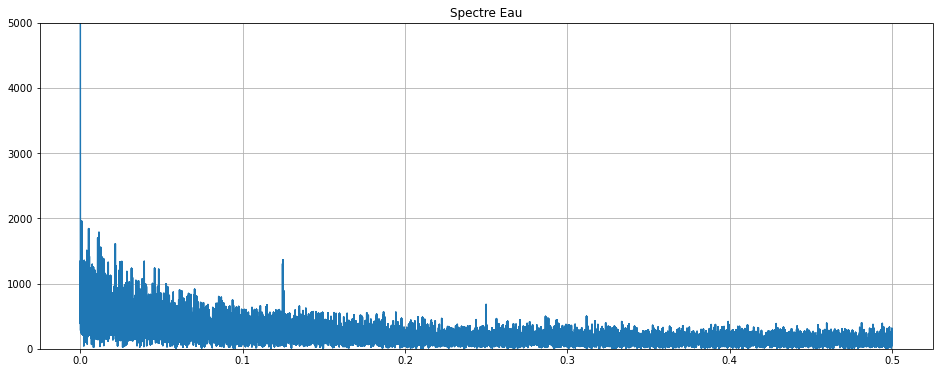

In [42]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre Eau')
plt.ylim((0, 5000))
plt.grid();

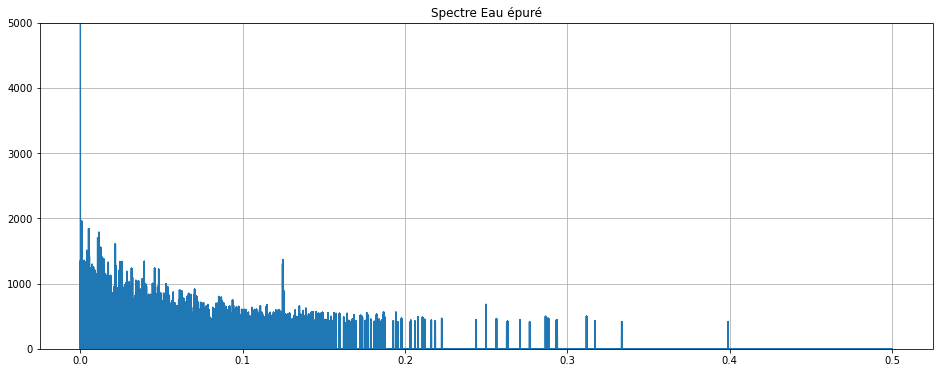

In [43]:
# Elimination du bruit
filtre = 400
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre Eau épuré')
plt.ylim((0, 5000))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


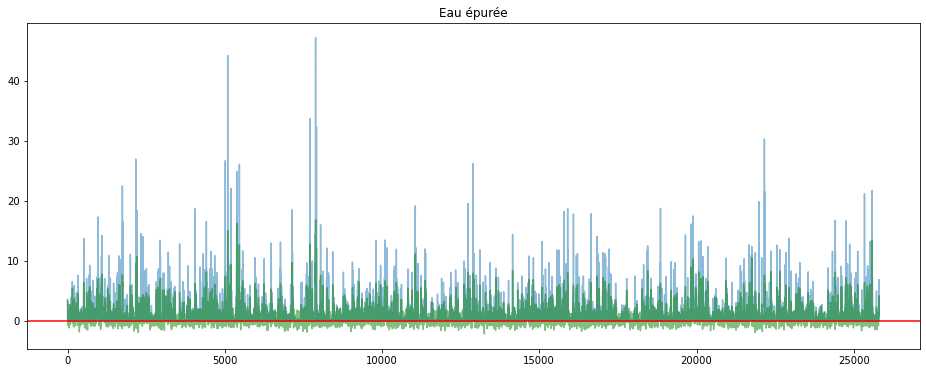

In [44]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('Eau épurée')
plt.axhline(0, color = 'r')
plt.savefig('./png/signal_exog_pluie_3H');

In [45]:
france['Eau'] = filtered_data.tolist()

<ipython-input-45-fe59d5bab027>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['Eau'] = filtered_data.tolist()


# Soleil

In [46]:
data = df['Soleil'].values

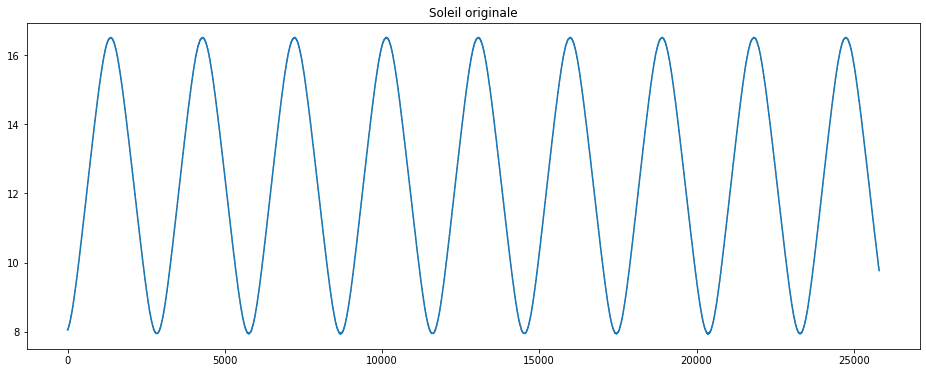

In [47]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Soleil originale');

In [48]:
france['Soleil'] = df['Soleil'].tolist()

<ipython-input-48-841e8fff8b37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['Soleil'] = df['Soleil'].tolist()


# TCH Nucléaire

In [49]:
data = df['TCH_nucleaire'].values

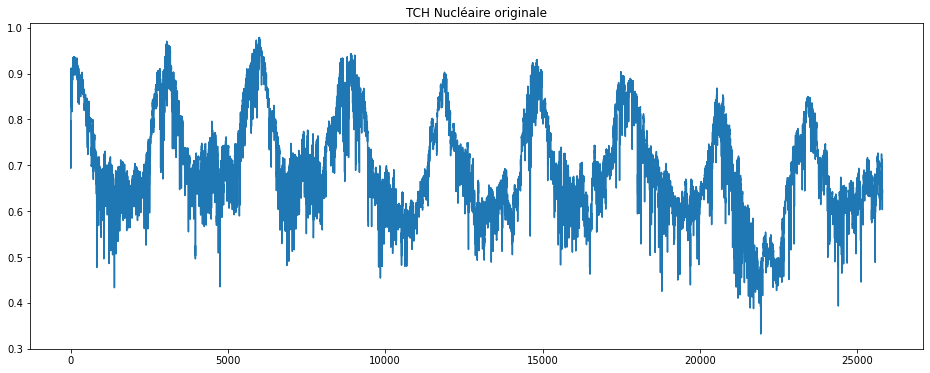

In [50]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('TCH Nucléaire originale');

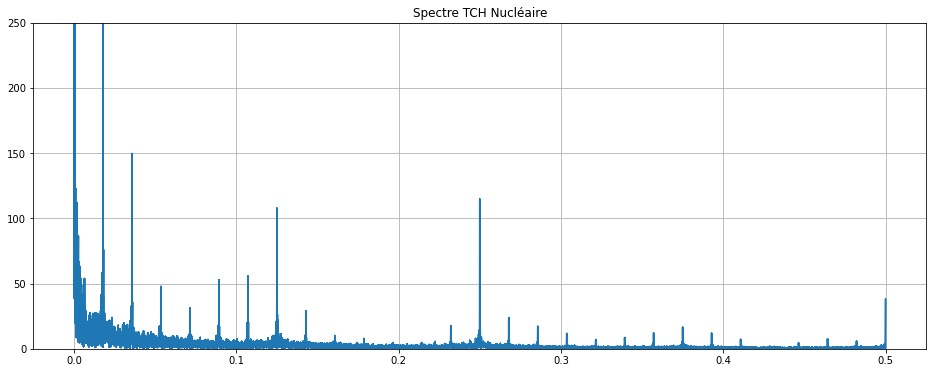

In [51]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre TCH Nucléaire')
plt.ylim((0, 250))
plt.grid();

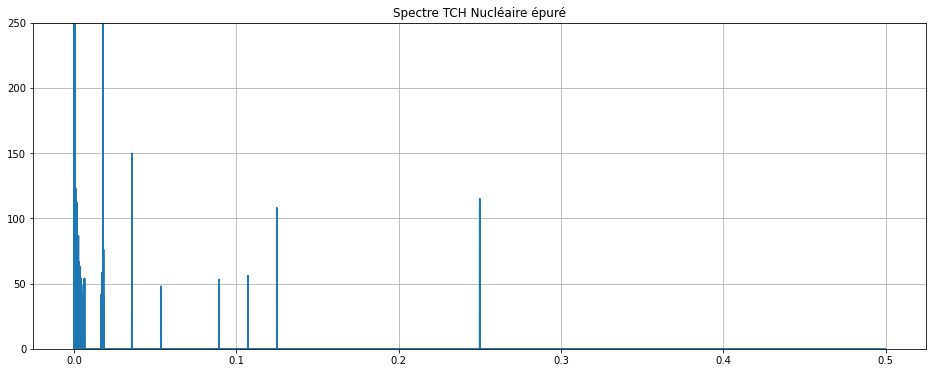

In [52]:
# Elimination du bruit
filtre = 40
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre TCH Nucléaire épuré')
plt.ylim((0, 250))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


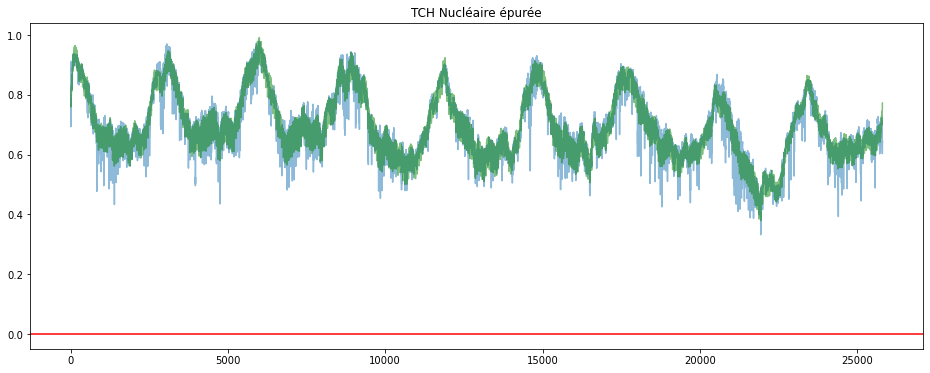

In [53]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('TCH Nucléaire épurée')
plt.axhline(0, color = 'r')
plt.savefig('./png/signal_exog_tch_nucleaire_3H');

In [54]:
france['TCH_nucleaire'] = filtered_data.tolist()

<ipython-input-54-5f5d879a3e8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['TCH_nucleaire'] = filtered_data.tolist()


# TCH Thermique

In [55]:
data = df['TCH_thermique'].values

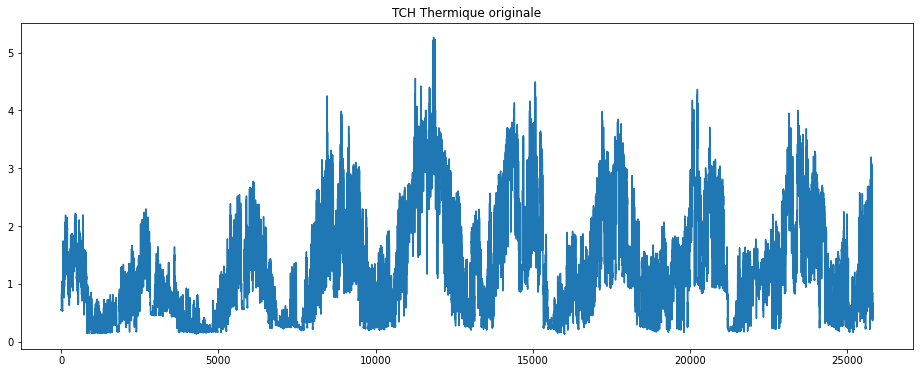

In [56]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('TCH Thermique originale');

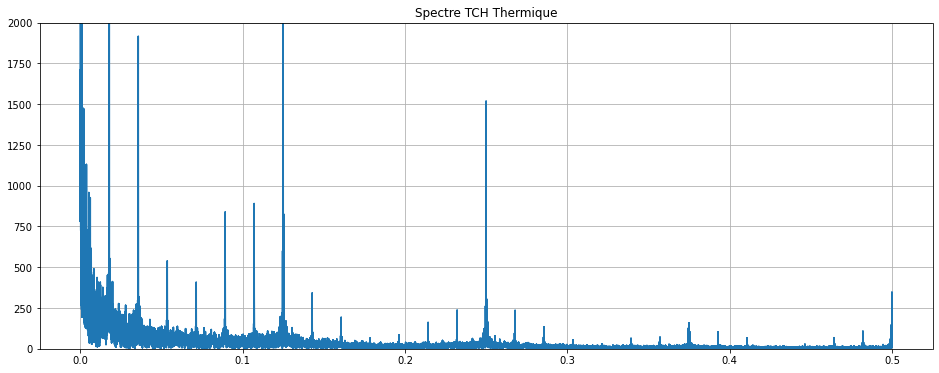

In [57]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre TCH Thermique')
plt.ylim((0, 2000))
plt.grid();

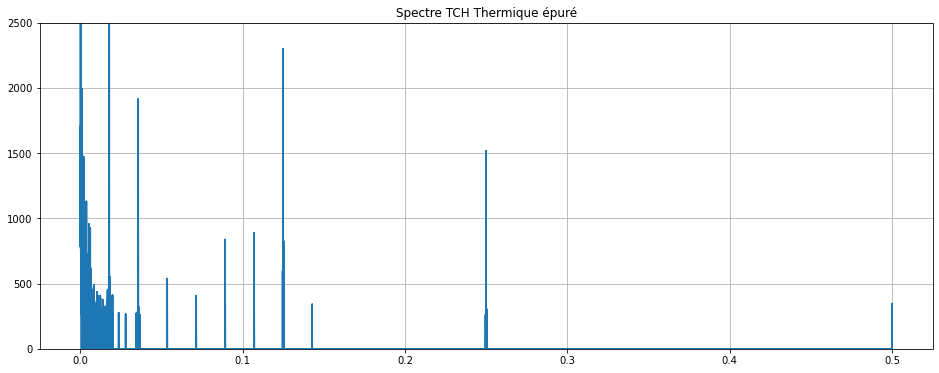

In [58]:
# Elimination du bruit
filtre = 250
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre TCH Thermique épuré')
plt.ylim((0, 2500))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


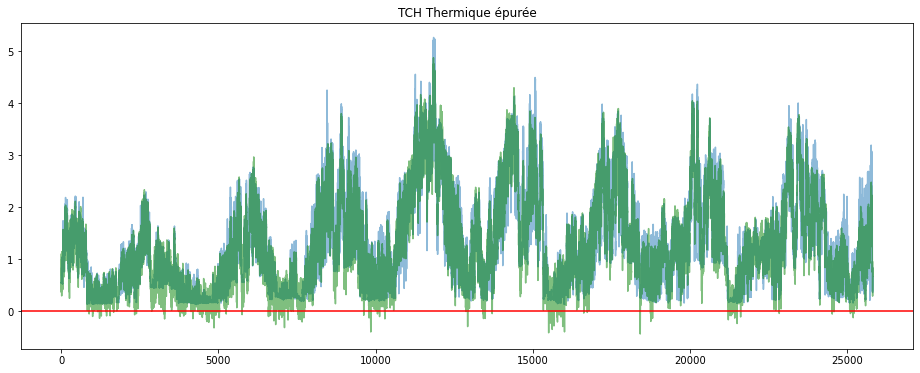

In [59]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('TCH Thermique épurée')
plt.axhline(0, color = 'r')
plt.savefig('./png/signal_exog_tch_thermique_3H');

In [60]:
france['TCH_thermique'] = filtered_data.tolist()

<ipython-input-60-fbb033cad4e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['TCH_thermique'] = filtered_data.tolist()


# TCH Hydraulique

In [61]:
data = df['TCH_hydraulique'].values

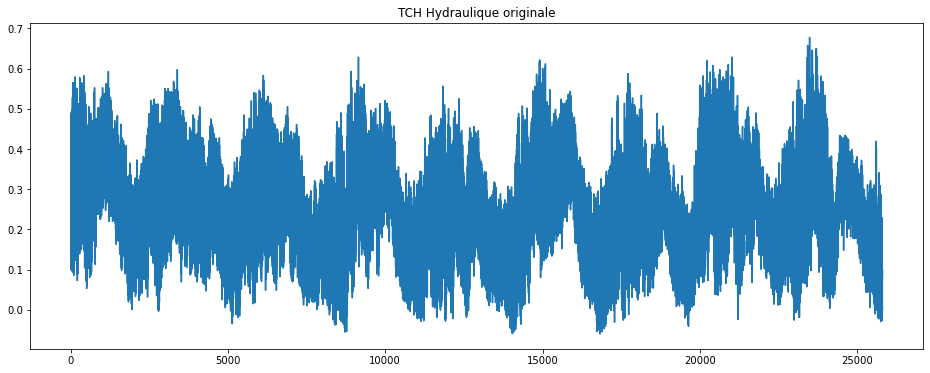

In [62]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('TCH Hydraulique originale');

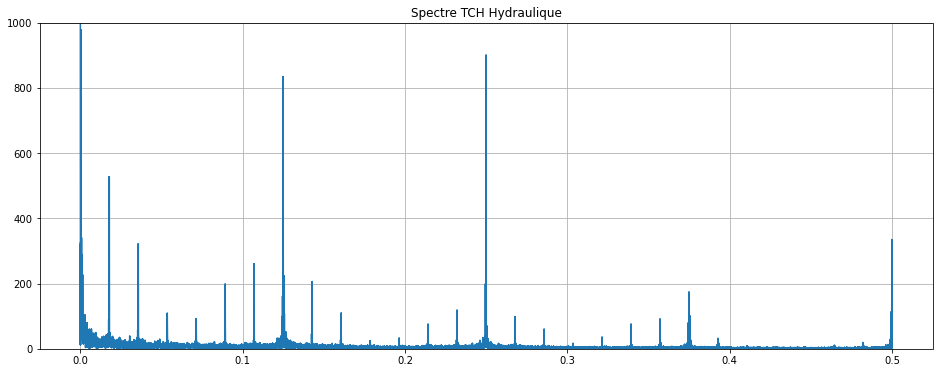

In [63]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre TCH Hydraulique')
plt.ylim((0, 1000))
plt.grid();

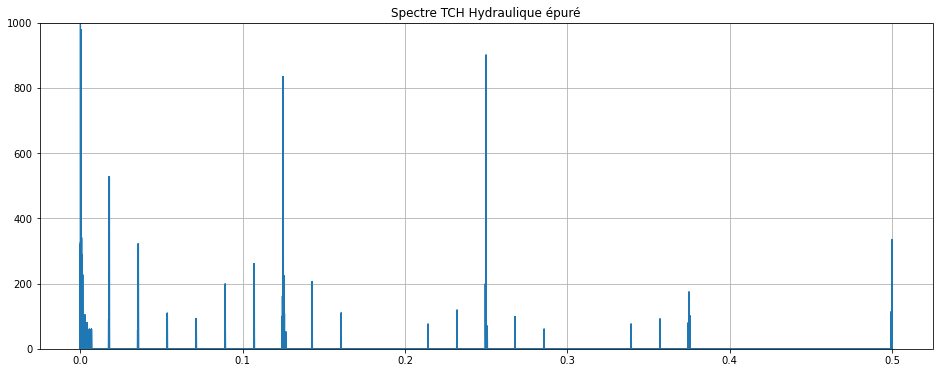

In [64]:
# Elimination du bruit
filtre = 50
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre TCH Hydraulique épuré')
plt.ylim((0, 1000))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


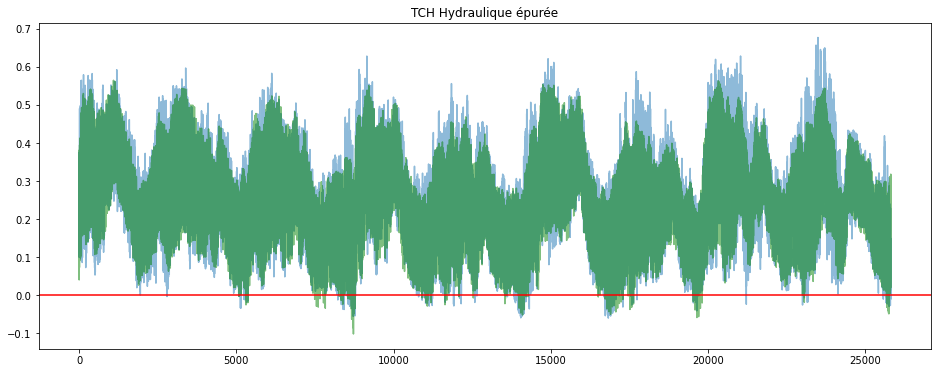

In [65]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('TCH Hydraulique épurée')
plt.axhline(0, color = 'r')
plt.savefig('./png/signal_exog_tch_hydraulique_3H');

In [66]:
france['TCH_hydraulique'] = filtered_data.tolist()

<ipython-input-66-e58c63379f35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france['TCH_hydraulique'] = filtered_data.tolist()


# TCH Solaire

In [67]:
data = df['TCH_solaire'].values

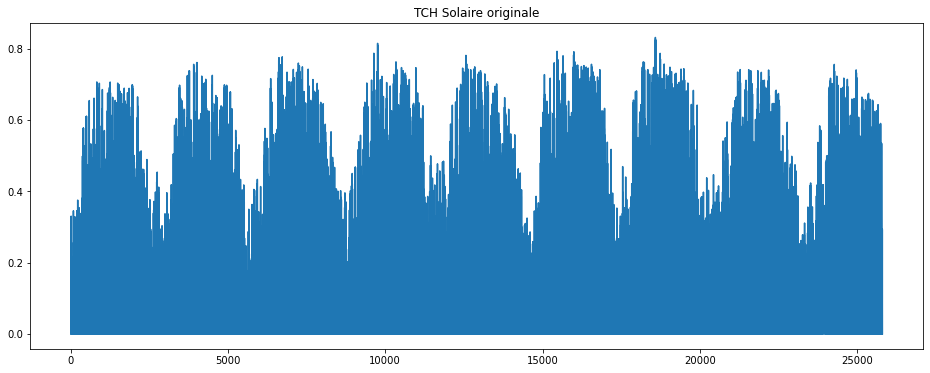

In [68]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('TCH Solaire originale');

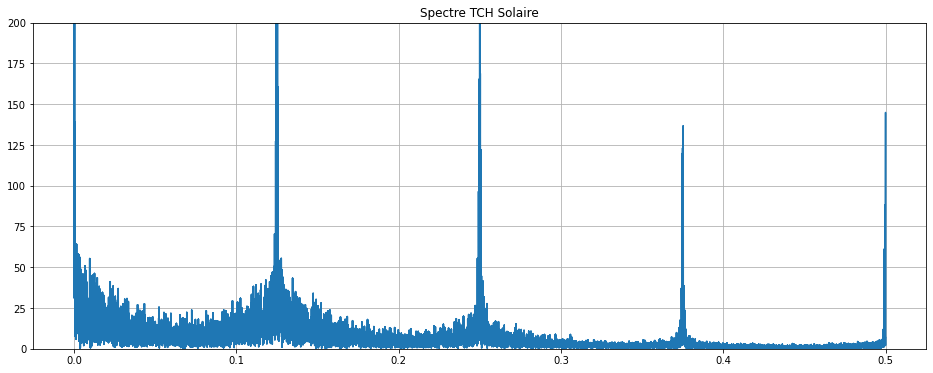

In [69]:
# Spectre du signal
fourier = fftpack.fft(data)
frequences = fftpack.fftfreq(data.size)
power = np.abs(fourier)
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), power)
plt.title('Spectre TCH Solaire')
plt.ylim((0, 200))
plt.grid();

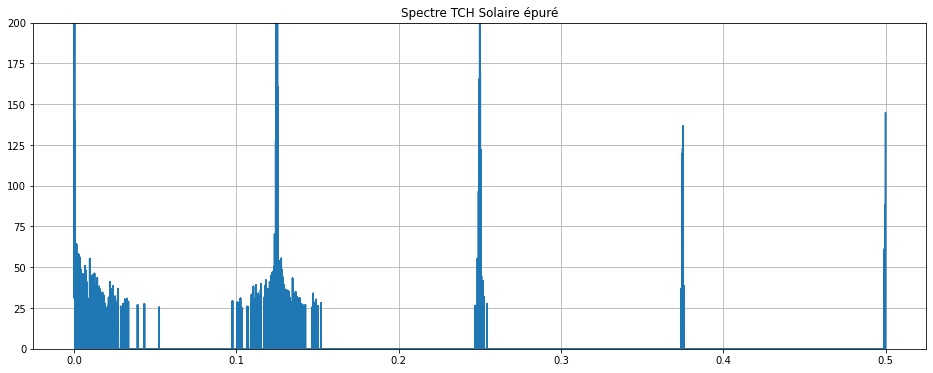

In [70]:
# Elimination du bruit
filtre = 25
fourier[power < filtre] = 0
plt.figure(figsize=(16, 6))
plt.plot(np.abs(frequences), np.abs(fourier))
plt.title('Spectre TCH Solaire épuré')
plt.ylim((0, 200))
plt.grid();

C:\Python\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


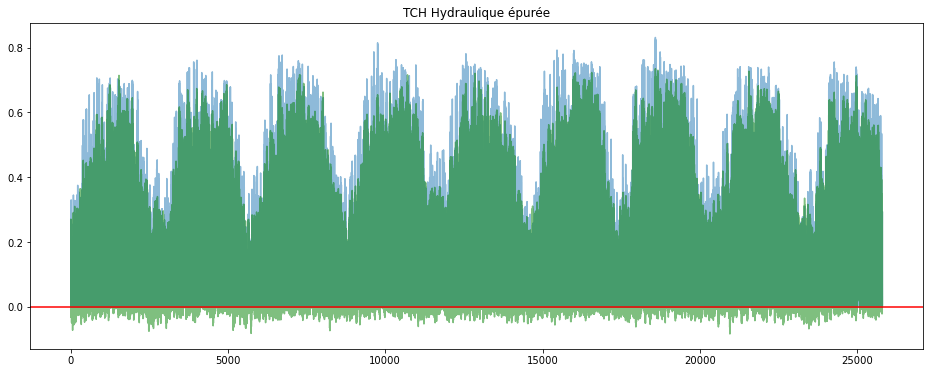

In [71]:
# Reconstitution du signal
filtered_data = fftpack.ifft(fourier)
plt.figure(figsize=(16, 6))
plt.plot(data, alpha = 0.5)
plt.plot(filtered_data, color = 'g', alpha = 0.5)
plt.title('TCH Hydraulique épurée')
plt.axhline(0, color = 'r')
plt.savefig('./png/signal_exog_tch_solaire_3H');

In [72]:
france['TCH_solaire'] = filtered_data.tolist()

### Sauvegarde des variables exogènes filtrées

In [73]:
france.set_index('Dates', inplace = True)
france = france.astype(float)
france.head(1)

C:\Python\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:995: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


,Vent,Humidite,Pluie_eol,Temperature_eol,Diff_pression,Chauffage,Eau,Soleil,TCH_nucleaire,TCH_thermique,TCH_hydraulique,TCH_solaire
Dates,,,,,,,,,,,,
2013-01-01 00:00:00,5.269459,92.900351,0.602728,10.172597,-1286.569161,-10.174321,3.570189,8.05,0.762852,0.391173,0.106765,0.00932


In [74]:
france.to_csv('./exog/exog_3H_FR_filtered.csv')